
# <div align="center">Practice 2
## <center>Arboles
### <center>Eduardo Blanco
### <center>a01566271

Primero estoy importando todas las librerias:

In [241]:
import sys
import sklearn
assert sys.version_info >= (3, 5)
assert sklearn.__version__ >= "0.20"
from sklearn import preprocessing

import seaborn as sns

import graphviz
from graphviz import Source
from sklearn.tree  import export_graphviz

import numpy as np
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


from matplotlib.colors import ListedColormap



In [198]:

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok = True)



In [199]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

---------------------------------------------------------------------------------------------------------------------




## Iris Data Set

Aqui solo estoy viendo los datos que voy a guardar en x, en este caso iris

In [200]:
# esto es X
iris = datasets.load_iris()
print(iris.data.shape)
print(iris.data)

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6

Aqui estoy viendo los labels

In [201]:
# esto es Y, LABELS
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [202]:
X = iris.data
X = X[:,2:]
Y = iris.target
N = iris.data.shape

Aqui estoy separando los training sets y test sets en sus respectivas ¨x´s¨ y ¨y´s¨

In [231]:
xTrain,xTest,yTrain,yTest= train_test_split(X,Y,test_size = .20, random_state = 32)

Estoy utilizando y entrenando el modelo de los arboles

In [232]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(xTrain, yTrain)

DecisionTreeClassifier()

Aqui estoy viendo como quedaron las y gorrito

In [233]:
#AQUI LO PROBAMOS
yHat = tree_clf.predict(xTest)
print(yHat)

[1 1 0 2 2 0 0 2 0 0 0 1 0 0 0 2 1 1 0 0 1 2 2 2 1 2 0 0 0 0 2 0 2 1 0 1]


Estamos visualizando el arbol y como se genero

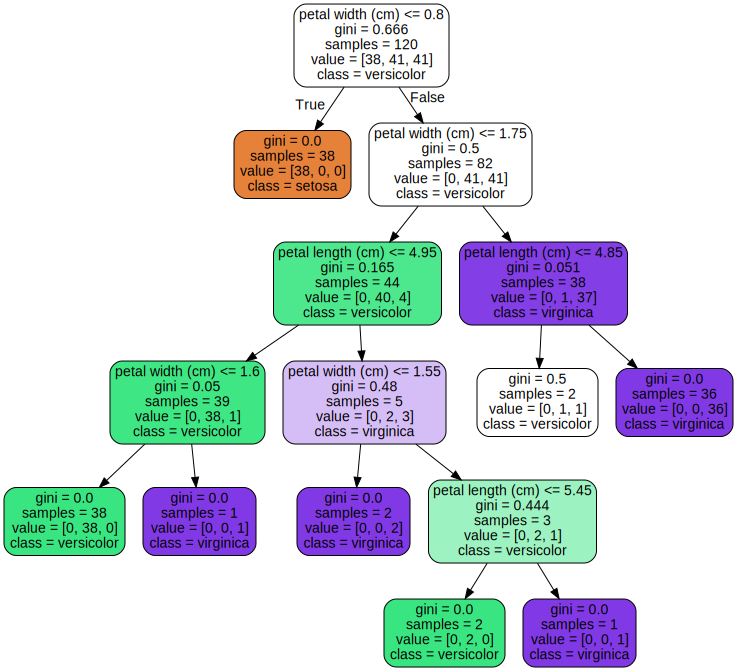

In [206]:
export_graphviz(
    tree_clf,
    out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)
Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

Aqui estamos viendo el accuracy que tiene y  pues alto para estar arriba de 90


In [234]:
accuracy = sklearn.metrics.accuracy_score(yTest, yHat) *100
print(accuracy)

91.66666666666666


Ahora vamos a implementar el modelo de regresion lineal para poder compararlos 


In [235]:
logReg = LogisticRegression(max_iter=15000)
#X_normalized = preprocessing.normalize(xTrain, norm='l2')

logReg = logReg.fit(xTrain,yTrain)

In [236]:
 print(logReg.score(xTest,yTest))

0.9166666666666666


Aqui podemos ver que el accuracy salio igual entonces no se puede determinar cual es mejor


Saving figure decision_tree_decision_boundaries_plot


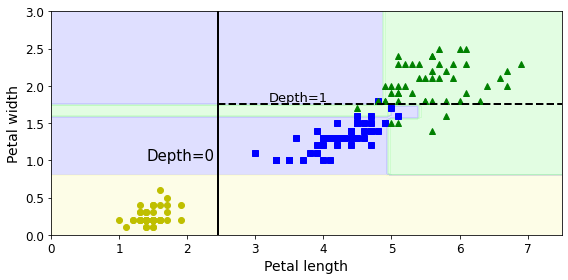

In [210]:

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False,plot_training=True):
    
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
        
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
        
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
        
    if legend:
        plt.legend(loc="lower right", fontsize=14)
        
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, Y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
save_fig("decision_tree_decision_boundaries_plot")


plt.show()

---------------------------------------------------------------------------------------------------------------------




## Cancer Data Set

Aqui solo estoy viendo los datos que voy a guardar en x, en este caso cancer y ahora
vamos a repetir el mismo proceso

In [211]:
# esto es X
cancer = datasets.load_breast_cancer()
print(cancer.data.shape)
print(cancer.data)

(569, 30)
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


Aqui estoy viendo los labels

In [212]:
# esto es Y, LABELS
print(cancer.target)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [213]:
X = cancer.data
X = X[:,2:]
Y = cancer.target
N = cancer.data.shape

Aqui estoy separando los training sets y test sets en sus respectivas ¨x´s¨ y ¨y´s¨

In [214]:
xTrain,xTest,yTrain,yTest= train_test_split(X,Y,test_size = .20, random_state = 32)

In [215]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(xTrain, yTrain)

DecisionTreeClassifier()

In [216]:
#AQUI LO PROBAMOS
yHat = tree_clf.predict(xTest)
print(yHat)

[1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0
 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1
 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1
 1 0 1]


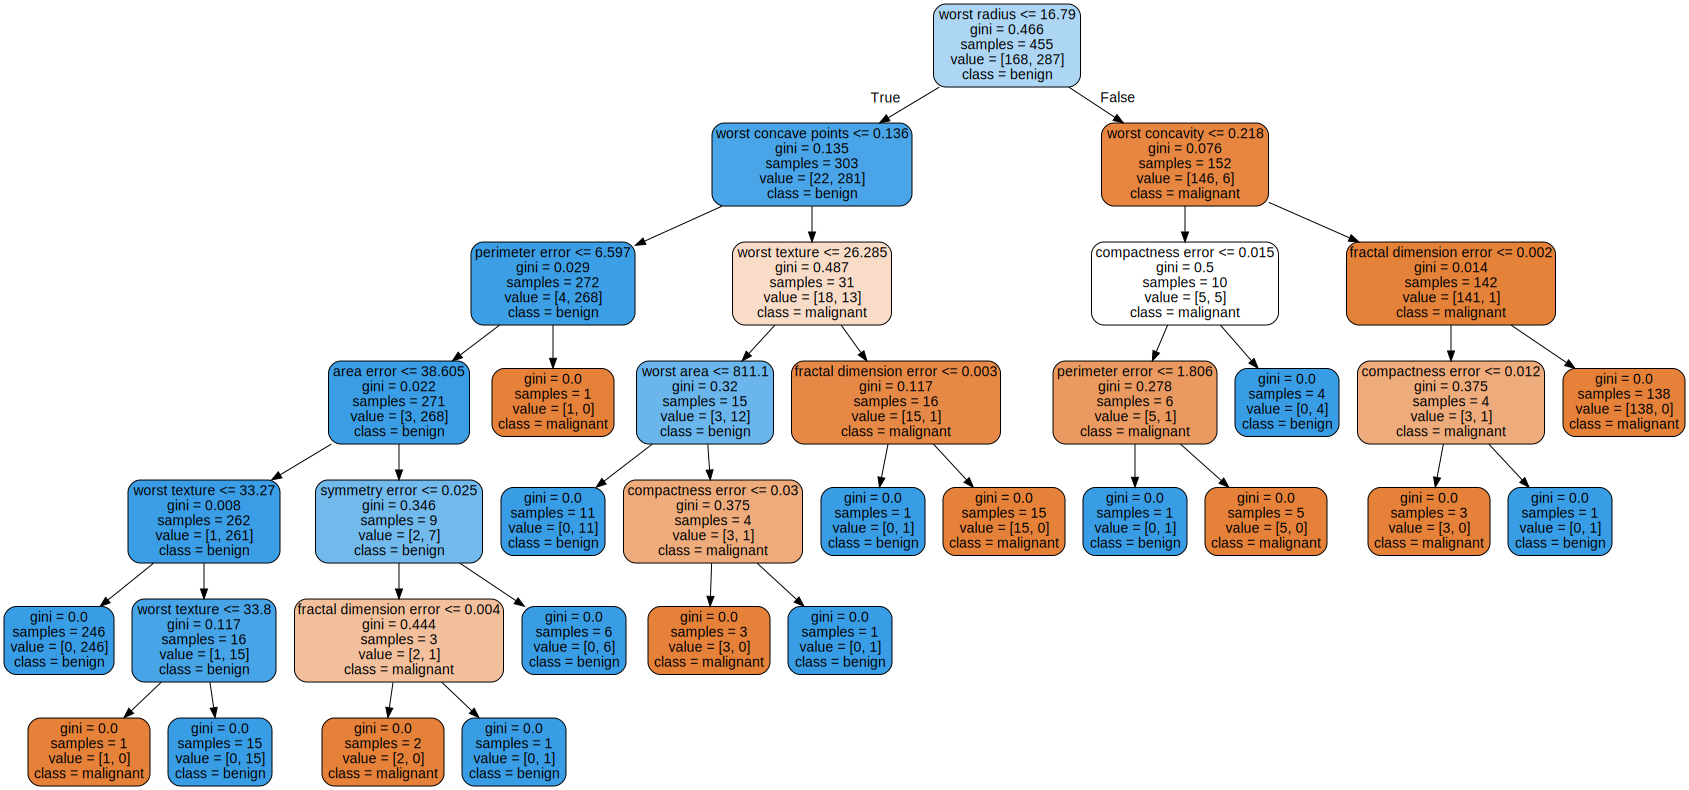

In [217]:
export_graphviz(
    tree_clf,
    out_file=os.path.join(IMAGES_PATH, "cancer_tree.dot"),
    feature_names=cancer.feature_names[2:],
    class_names=cancer.target_names,
    rounded=True,
    filled=True
)
Source.from_file(os.path.join(IMAGES_PATH, "cancer_tree.dot"))

In [218]:
accuracy = sklearn.metrics.accuracy_score(yTest, yHat) *100
print(accuracy)

87.71929824561403


In [219]:
logReg = LogisticRegression(max_iter=9000)
#X_normalized = preprocessing.normalize(xTrain, norm='l2')

logReg = logReg.fit(xTrain,yTrain)

In [220]:
 print(logReg.score(xTest,yTest))

0.9122807017543859


Aqui podemos ver que el accuracy en la regresion lineal salio un poco mejor con una diferencia del 5% entonces  se puede determinar que en este caso fue mejor, tambien tiene que ver que aumente los el maximo de ciclos para obtener un mejor resultado


----------------------------------------------------------------------------------------------------------------------

## Wine Data Set 

Aqui estoy accesando al wine data set y vamos a repetir el mismo proceso

In [221]:
# esto es X
wine = datasets.load_wine()
print(wine.data.shape)
print(wine.data)

(178, 13)
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [222]:
# esto es Y, LABELS
print(wine.target)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [223]:
X = wine.data
X = X[:,2:]
Y = wine.target
N = wine.data.shape

In [224]:
xTrain,xTest,yTrain,yTest= train_test_split(X,Y,test_size = .20, random_state = 32)

In [225]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(xTrain, yTrain)

DecisionTreeClassifier()

In [226]:
#AQUI LO PROBAMOS
yHat = tree_clf.predict(xTest)
print(yHat)

[1 1 0 2 2 0 0 2 0 0 0 2 0 0 0 2 1 1 0 0 1 2 2 2 1 2 0 0 0 0 2 0 2 1 0 1]


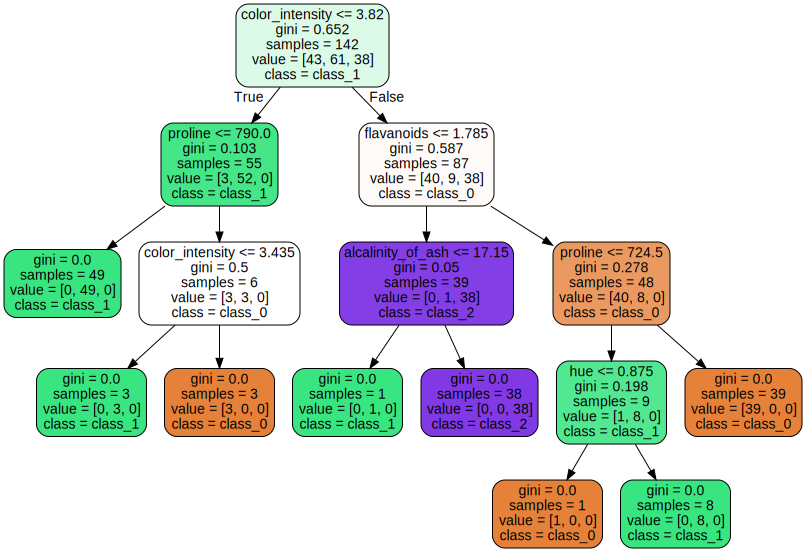

In [227]:
export_graphviz(
    tree_clf,
    out_file=os.path.join(IMAGES_PATH, "wine.dot"),
    feature_names=wine.feature_names[2:],
    class_names=wine.target_names,
    rounded=True,
    filled=True
)
Source.from_file(os.path.join(IMAGES_PATH, "wine.dot"))

In [228]:
accuracy = sklearn.metrics.accuracy_score(yTest, yHat) *100
print(accuracy)

94.44444444444444


In [229]:
logReg = LogisticRegression(max_iter=9000)
#X_normalized = preprocessing.normalize(xTrain, norm='l2')

logReg = logReg.fit(xTrain,yTrain)

In [230]:
 print(logReg.score(xTest,yTest))

0.9166666666666666


Aqui podemos ver que el accuracy en la regresion lineal salio un poco peor con una diferencia del 3% aprox entonces  se puede determinar que en este caso fue peor, Creo que se puede concluir que los dos modelos son buenos para ambos casos y depende de la situacion y otros factores cual resulta mejor.